#   신경망 구성
*    레이어(layer) : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력 받아
*    모듈(module) :  한 개 이상의 계층이 모여서 구성
*    모델(model) : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지

주로 가중치(weights),편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (weight값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html

In [1]:
import torch.nn as nn
import torch

nn.Linear 계층 예제

In [2]:
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30) # nn.Linear(in_feature,out_feature)

output = m(input)
print(output)
print(output.size()) # (128,30)

tensor([[-0.5200,  0.2276,  1.6099,  ...,  0.0247, -1.3127,  2.1366],
        [-0.4135,  1.1911,  0.1845,  ..., -0.5284,  2.2625, -0.3976],
        [ 0.5068, -0.7452,  0.7320,  ...,  0.0194, -0.7261,  2.0830],
        ...,
        [-2.1577, -0.5761, -0.3858,  ..., -0.6736, -0.6149, -0.5192],
        [ 0.5571,  0.2081,  0.3647,  ..., -1.3450, -0.4663,  0.2876],
        [-0.2863, -1.6707, -0.7375,  ...,  1.3619,  0.4700,  1.0042]])
tensor([[ 0.2351,  0.3576,  1.4227,  ..., -0.8860, -0.2117, -0.0896],
        [ 0.0471, -1.2750, -1.5853,  ...,  0.7912,  0.5227, -0.1612],
        [ 0.3328, -0.5783, -1.1429,  ...,  0.4948,  0.2886, -0.0445],
        ...,
        [-0.3733,  0.0324,  0.7707,  ...,  0.0360, -0.3379,  0.0379],
        [ 0.0981,  0.1904, -0.4269,  ..., -0.0488,  0.4735,  0.0459],
        [ 0.3181, -0.3001, -0.4779,  ...,  0.1892, -0.4167,  0.7927]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


nn.Conv2d 계층 예시

In [3]:
input = torch.randn(20,16,50,100)
print(input.size()) # (128,30)

torch.Size([20, 16, 50, 100])


In [4]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [5]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


#     컨볼루션 레이어(Convolution Layers)
nn.Con2d 예제
*     in_channels : channel의 갯수
*     out_channels : 출력 채널의 갯수
*     kernel_size : 커널(필터) 사이즈


In [6]:
nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [7]:
layer= nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

weight 확인

In [18]:
weight = layer.weight
weight.shape
# 컨볼루션 2d 만들었던 계층에 대한 웨이트에 대해서 shape가 나온다.

torch.Size([20, 1, 5, 5])

weight는 detach()를 통해 꺼내줘야 numpy() 변환 가능

In [19]:
weight = weight.detach()

In [10]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

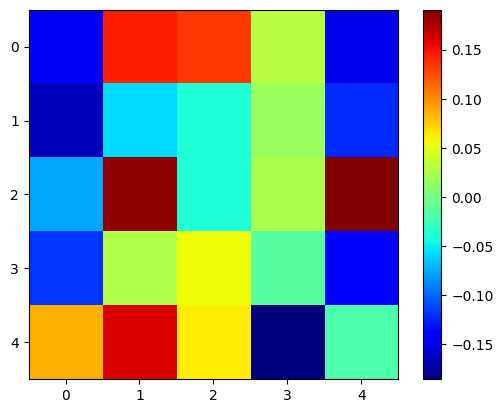

In [15]:
import matplotlib.pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()